# Learn Avalanche in 5 Minutes
## A Short Guide for Researchers on the Run

Avalanche is mostly about making the life of a continual learning researcher easier.

Below, you can see the main Avalanche modules and how they interact with each other.

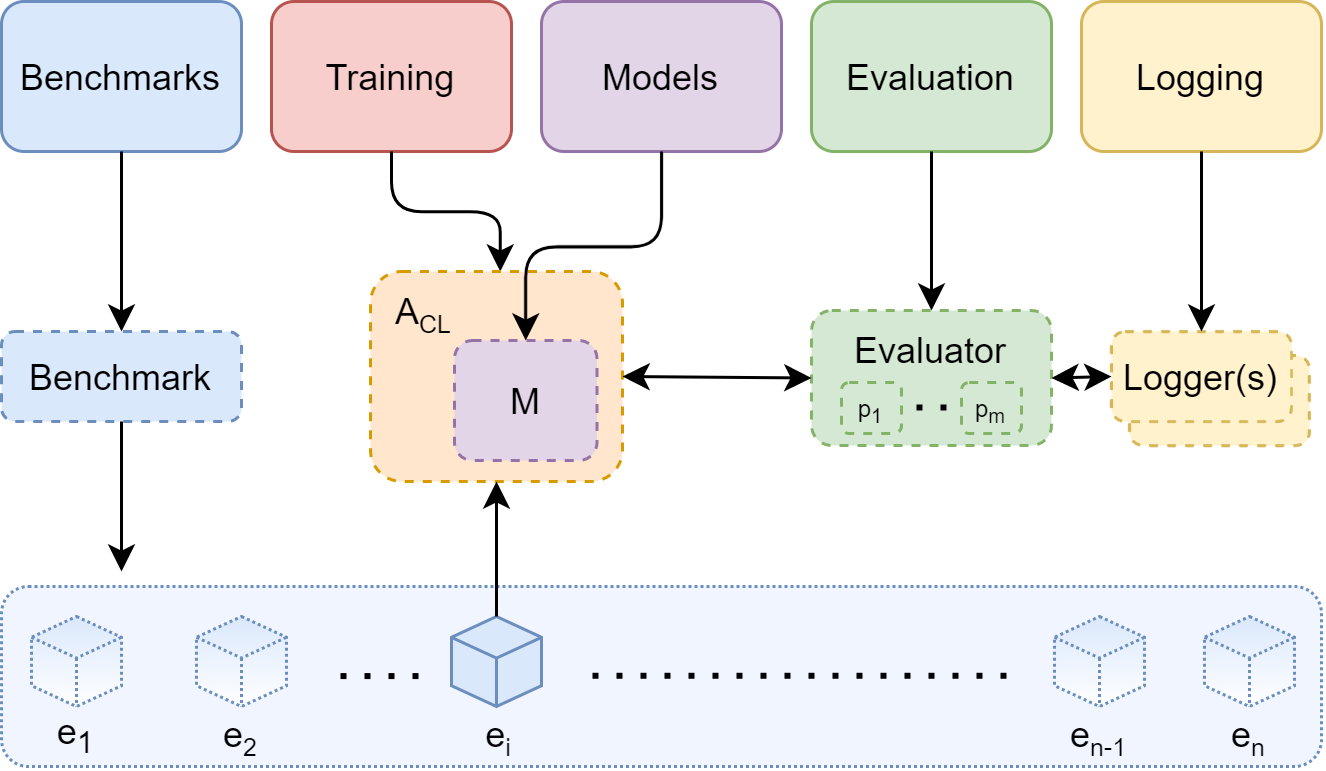

**What are the three pillars of any respectful continual learning research project?**

1. **`Benchmarks`**: Machine learning researchers need multiple benchmarks with efficient data handling utils to design and prototype new algorithms. Quantitative results on ever-changing benchmarks has been one of the driving forces of *Deep Learning*.
1. **`Training`**: Efficient implementation and training of continual learning algorithms; comparisons with other baselines and state-of-the-art methods become fundamental to asses the quality of an original algorithmic proposal.
1. **`Evaluation`**: *Training* utils and *Benchmarks* are not enough alone to push continual learning research forward. Comprehensive and sound *evaluation protocols* and *metrics* need to be employed as well.

**With Avalanche, you can find all these three fundamental pieces together and much more, in a single and coherent, well-maintained codebase.**

Let's take a quick tour on how you can use Avalanche for your research projects with a **5-minutes guide**, for *researchers on the run*!

In this short guide we assume **you have already installed** Avalanche. If you haven't yet, check out how you can do it following our [How to Install](https://avalanche.continualai.org/getting-started/how-to-install) guide.

## 🏛️ General Architecture

Avalanche is organized in five main modules:

1. **Benchmarks**: This module maintains a uniform API for data handling: mostly generating a stream of data from one or more datasets. It contains all the major CL benchmarks (similar to what has been done for [torchvision](https://pytorch.org/docs/stable/torchvision/index.html)).
1. **Training**: This module provides all the necessary utilities concerning model training. This includes simple and efficient ways of implement new continual learning strategies as well as a set pre-implemented CL baselines and state-of-the-art algorithms you will be able to use for comparison!
1. **Evaluation**: This modules provides all the utilities and metrics that can help in evaluating a CL algorithm with respect to all the factors we believe to be important for a continually learning system.
1. **Models**: In this module you'll be able to find several model architectures and pre-trained models that can be used for your continual learning experiment (similar to what has been done in [torchvision.models](https://pytorch.org/docs/stable/torchvision/index.html)).
1. **Logging**: It includes advanced logging and plotting features, including native stdout, file and [Tensorboard](https://www.tensorflow.org/tensorboard) support (How cool it is to have a complete, interactive dashboard, tracking your experiment metrics in real-time with a single line of code?)

In the graphic below, you can see how Avalanche sub-modules are available and organized as well:

We will learn more about each of them during this tutorial series, but keep in mind that the [Avalanche API documentation](https://avalanche-api.continualai.org/en/latest/) is your friend as well!

All right, let's start with the benchmarks module right away 👇

## 📚 Benchmarks

The benchmark module offers three main features:
1. **Datasets**: a comprehensive list of PyTorch Datasets ready to use (It includes all the Torchvision Datasets and more!).
1. **Classic Benchmarks**: a set of classic Continual Learning Benchmarks ready to be used (there can be multiple benchmarks based on a single dataset).
1. **Generators**: a set of functions you can use to generate your own benchmark starting from any PyTorch Dataset!

### Datasets

Datasets can be imported in Avalanche as simply as:

In [ ]:
from avalanche.benchmarks.datasets import MNIST, FashionMNIST, KMNIST, EMNIST, \
    QMNIST, FakeData, CocoCaptions, CocoDetection, LSUN, ImageNet, CIFAR10, \
    CIFAR100, STL10, SVHN, PhotoTour, SBU, Flickr8k, Flickr30k, VOCDetection, \
    VOCSegmentation, Cityscapes, SBDataset, USPS, Kinetics400, HMDB51, UCF101, \
    CelebA, CORe50Dataset, TinyImagenet, CUB200, OpenLORIS, MiniImageNetDataset, Stream51, \
    CLEARDataset

Of course, you can use them as you would use any *PyTorch Dataset*.

### Benchmarks Basics

The *Avalanche* benchmarks (instances of the Scenario class), contains several attributes that describe the benchmark. However, the most important ones are the `train` and `test` streams.

In *Avalanche* we often suppose to have access to these **two parallel stream** of data (even though some benchmarks may not provide such feature, but contain just a unique test set).

Each of these `streams` are iterable, indexable and sliceable objects that are composed of **experiences**. Experiences are batch of data (or "tasks") that can be provided with or without a specific task label.

### Classic Benchmarks

*Avalanche* maintains a set of commonly used benchmarks built on top of one or multiple datasets.

In [ ]:
from avalanche.benchmarks.classic import CORe50, SplitTinyImageNet, SplitCIFAR10, \
    SplitCIFAR100, SplitCIFAR110, SplitMNIST, RotatedMNIST, PermutedMNIST, SplitCUB200

# creating the benchmark (scenario object)
perm_mnist = PermutedMNIST(
    n_experiences=3,
    seed=1234,
)

# recovering the train and test streams
train_stream = perm_mnist.train_stream
test_stream = perm_mnist.test_stream

# iterating over the train stream
for experience in train_stream:
    print("Start of task ", experience.task_label)
    print('Classes in this task:', experience.classes_in_this_experience)

    # The current Pytorch training set can be easily recovered through the 
    # experience
    current_training_set = experience.dataset
    # ...as well as the task_label
    print('Task {}'.format(experience.task_label))
    print('This task contains', len(current_training_set), 'training examples')

    # we can recover the corresponding test experience in the test stream
    current_test_set = test_stream[experience.current_experience].dataset
    print('This task contains', len(current_test_set), 'test examples')

### Benchmarks Generators

What if we want to create a new benchmark that is not present in the *"Classic"* ones? Well, in that case Avalanche offers a number of utilities that you can use to create your own benchmark with maximum flexibility: the **benchmark generators**!

The *specific* scenario generators are useful when starting from one or multiple PyTorch datasets and you want to create a **"New Instances"** or **"New Classes"** benchmark: i.e. it supports the easy and flexible creation of a *Domain-Incremental*, *Class-Incremental* or *Task-Incremental* scenarios among others.

In [ ]:
from avalanche.benchmarks.generators import nc_benchmark, ni_benchmark
from torchvision.datasets import MNIST

mnist_train = MNIST('.', train=True, download=True)
mnist_test = MNIST('.', train=False)

benchmark = ni_benchmark(
    mnist_train, mnist_test, n_experiences=10, shuffle=True, seed=1234,
    balance_experiences=True
)
benchmark = nc_benchmark(
    mnist_train, mnist_test, n_experiences=10, shuffle=True, seed=1234,
    task_labels=False
)

Finally, if your ideal benchmark does not fit well in the aforementioned *Domain-Incremental*, *Class-Incremental* or *Task-Incremental* scenarios, you can always use our **generic generators**:
* **filelist_benchmark**
* **paths_benchmark**
* **dataset_benchmark**
* **tensors_benchmark**

In [ ]:
from avalanche.benchmarks.generators import filelist_benchmark, dataset_benchmark, \
                                            tensors_benchmark, paths_benchmark

You can read more about how to use them the full *Benchmarks* module tutorial!

## 💪 Training

The `training` module in *Avalanche* is build on modularity and it has two main goals:
1. provide a set of standard *continual learning baselines* that can be easily run for comparison;
1. provide the necessary utilities to **implement and run your own strategy** in the most efficient and simple way possible thanks to the building blocks we already prepared for you.

### Strategies

If you want to compare your strategy with other classic continual learning algorithms or baselines, in *Avalanche* this is as simple as creating an object:

In [ ]:
from avalanche.models import SimpleMLP
from avalanche.training import Naive, CWRStar, Replay, GDumb, \
    Cumulative, LwF, GEM, AGEM, EWC, AR1
from torch.optim import SGD
from torch.nn import CrossEntropyLoss

model = SimpleMLP(num_classes=10)
cl_strategy = Naive(
    model, SGD(model.parameters(), lr=0.001, momentum=0.9),
    CrossEntropyLoss(), train_mb_size=100, train_epochs=4, eval_mb_size=100
)

### Create your own Strategy

The simplest way to build your own strategy is to create a python class that implements the main `train` and `eval` methods.

Let's define our Continual Learning algorithm *"MyStrategy"* as a simple python class:


In [ ]:
from torch.utils.data import DataLoader

class MyStrategy():
    """My Basic Strategy"""

    def __init__(self, model, optimizer, criterion):
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion

    def train(self, experience):
        # here you can implement your own training loop for each experience (i.e. 
        # batch or task).

        train_dataset = experience.dataset
        t = experience.task_label
        train_data_loader = DataLoader(
            train_dataset, num_workers=4, batch_size=128
        )

        for epoch in range(1):
            for mb in train_data_loader:
                # you magin here...
                pass

    def eval(self, experience):
        # here you can implement your own eval loop for each experience (i.e. 
        # batch or task).

        eval_dataset = experience.dataset
        t = experience.task_label
        eval_data_loader = DataLoader(
            eval_dataset, num_workers=4, batch_size=128
        )

        # eval here

Then, we can use our strategy as we would do for the pre-implemented ones:

In [ ]:
from avalanche.models import SimpleMLP
from avalanche.benchmarks import SplitMNIST

# Benchmark creation
benchmark = SplitMNIST(n_experiences=5)

# Model Creation
model = SimpleMLP(num_classes=benchmark.n_classes)

# Create the Strategy Instance (MyStrategy)
cl_strategy = MyStrategy(
    model, SGD(model.parameters(), lr=0.001, momentum=0.9),
    CrossEntropyLoss())

# Training Loop
print('Starting experiment...')

for exp_id, experience in enumerate(benchmark.train_stream):
    print("Start of experience ", experience.current_experience)

    cl_strategy.train(experience)
    print('Training completed')

    print('Computing accuracy on the current test set')
    cl_strategy.eval(benchmark.test_stream[exp_id])

While this is the easiest possible way to add your own strategy, *Avalanche* supports more sophisticated modalities (based on *callbacks*) that lets you write **more neat**, modular and reusable code**, inheriting functionality from a parent classes and using **pre-implemented plugins**.

Check out more details about what Avalanche can offer in this module following the *"Training"* chapter of the **"From Zero to Hero"** tutorial!

## 📈 Evaluation

The `evaluation` module is quite straightforward: it offers all the basic functionalities to evaluate and keep track of a continual learning experiment.

This is mostly done through the **Metrics** and the **Loggers**. The **Metrics** provide a set of classes which implements the main continual learning metrics like Accuracy, Forgetting, Memory Usage, Running Times, etc.  
Metrics should be created via the utility functions (e.g. `accuracy_metrics`, `timing_metrics` and others) specifying in the arguments when those metrics should be computed (after each minibatch, epoch, experience etc...).  
The **Loggers** specify a way to report the metrics (e.g. with Tensorboard, on console or others). Loggers are created by instantiating the respective class.

Metrics and loggers interact via the **Evaluation Plugin**: this is the main object responsible of tracking the experiment progress. Metrics and loggers are directly passed to the `EvaluationPlugin` instance. You will see the output of the loggers automatically during training and evaluation! Let's see how to put this together in few lines of code:

In [ ]:
# utility functions to create plugin metrics
from avalanche.evaluation.metrics import accuracy_metrics, loss_metrics, forgetting_metrics
from avalanche.logging import InteractiveLogger, TensorboardLogger
from avalanche.training.plugins import EvaluationPlugin

eval_plugin = EvaluationPlugin(
    # accuracy after each training epoch
    # and after each evaluation experience
    accuracy_metrics(epoch=True, experience=True),
    # loss after each training minibatch and each
    # evaluation stream
    loss_metrics(minibatch=True, stream=True),
    # catastrophic forgetting after each evaluation
    # experience
    forgetting_metrics(experience=True, stream=True), 
    # add as many metrics as you like
    loggers=[InteractiveLogger(), TensorboardLogger()])

# pass the evaluation plugin instance to the strategy
# strategy = EWC(..., evaluator=eval_plugin)

# THAT'S IT!!

For more details about the evaluation module (how to write new metrics/loggers, a deeper tutorial on metrics) check out the extended guide in the *"Evaluation"* chapter of the **"From Zero to Hero"** *Avalanche* tutorial!

## 🔗 Putting all Together

You've learned how to install *Avalanche*, how to create benchmarks that can suit your needs, how you can create your own continual learning algorithm and how you can evaluate its performance.

Here we show how you can use all these modules together to **design your experiments** as quantitative supporting evidence for your research project or paper.

In [ ]:
from avalanche.benchmarks.classic import SplitMNIST
from avalanche.evaluation.metrics import forgetting_metrics, accuracy_metrics,\
    loss_metrics, timing_metrics, cpu_usage_metrics, StreamConfusionMatrix,\
    disk_usage_metrics, gpu_usage_metrics
from avalanche.models import SimpleMLP
from avalanche.logging import InteractiveLogger, TextLogger, TensorboardLogger
from avalanche.training.plugins import EvaluationPlugin
from avalanche.training import Naive

from torch.optim import SGD
from torch.nn import CrossEntropyLoss

benchmark = SplitMNIST(n_experiences=5)

# MODEL CREATION
model = SimpleMLP(num_classes=scenario.n_classes)

# DEFINE THE EVALUATION PLUGIN and LOGGERS
# The evaluation plugin manages the metrics computation.
# It takes as argument a list of metrics, collectes their results and returns 
# them to the strategy it is attached to.

# log to Tensorboard
tb_logger = TensorboardLogger()

# log to text file
text_logger = TextLogger(open('log.txt', 'a'))

# print to stdout
interactive_logger = InteractiveLogger()

eval_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    loss_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    timing_metrics(epoch=True),
    cpu_usage_metrics(experience=True),
    forgetting_metrics(experience=True, stream=True),
    StreamConfusionMatrix(num_classes=scenario.n_classes, save_image=False),
    disk_usage_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    loggers=[interactive_logger, text_logger, tb_logger],
    benchmark=benchmark
)

# CREATE THE STRATEGY INSTANCE (NAIVE)
cl_strategy = Naive(
    model, SGD(model.parameters(), lr=0.001, momentum=0.9),
    CrossEntropyLoss(), train_mb_size=500, train_epochs=1, eval_mb_size=100,
    evaluator=eval_plugin)

# TRAINING LOOP
print('Starting experiment...')
results = []
for experience in benchmark.train_stream:
    print("Start of experience: ", experience.current_experience)
    print("Current Classes: ", experience.classes_in_this_experience)

    # train returns a dictionary which contains all the metric values
    res = cl_strategy.train(experience, num_workers=4)
    print('Training completed')

    print('Computing accuracy on the whole test set')
    # eval also returns a dictionary which contains all the metric values
    results.append(cl_strategy.eval(benchmark.test_stream, num_workers=4))